In [6]:
# ==================================================
# Homework Set 3
# Daniel Csaba, UniID: dc2730
# February 25 2016
#
# Get live data from Yahoo Finance API and
# plot daily percentage change in share price
# versus market capitalization.
# ==================================================

%matplotlib inline
import matplotlib.pyplot as plt
import requests
import re
from math import log

# Open file containing data and create a list with the lines of the file
List = open("company_list_corrected.csv").readlines()

# Create a 2D array with the company data
# For each line creat a list with the following operations
# Immediately drop observations whose Mark Cap value is missing
# Use RegEx to separate the content of the csv file
# Problem: not every item wrapped in quote marks; coma and numbers appear in name as well
# Task is to identify relevant patterns characterizing the three values [Sticker, Name, Mark_Cap]

Data = [re.findall(r'\"(.+?)\"', line) + re.findall(r'\d+[\.]?\d+[M|B]?$', line) for line in List if not 'N/A' in line]

# Drop labels
Labels = Data[0]
del Data[0]

# Send query for share price change through API
# Invert market capitalization to float value & convert M/B to numbers
for index, observation in enumerate(Data):
    # Request daily precentage change in share price from Yahoo Finance API for each company in list
    # Format is '"+0.00%"\n' 
    r = float(requests.get('http://finance.yahoo.com/d/quotes.csv?s={}&f=p2'.format(Data[index][0])).text.strip('"%\n'))
    Data[index].append(r)
    # Replace M with million
    if Data[index][2].endswith('M'):
        Data[index][2] = float(Data[index][2].strip('M'))*1.0e6
    # Replace B with billion
    elif  Data[index][2].endswith('B'):
        Data[index][2] = float(Data[index][2].strip('B'))*1.0e9
    elif:
        Data[index][2] = float(Data[index][2])
        
        
# Invert 2D Array for plotting
Data_inv = list(map(list, zip(*Data)))

# Take absolute value of the price change
abs_change = [abs(element) for element in Data_inv[3]]
mark_cap = [log(element) for element in Data_inv[2]]

# Plot figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(mark_cap, abs_change, s=1, c='b', marker='.')
#axes[0].set_xlim([0, 1.0e9])
axes[0].set_ylim([-4,60])
axes[0].set_title('All data')
axes[0].set_xlabel('Market Capitalization log scale')
axes[0].set_ylabel('Share price change in %')

axes[1].scatter(mark_cap, abs_change, s=1, c='b', marker='.')
axes[1].set_xlim([0, 28])
axes[1].set_ylim([-4,60])
axes[1].set_title('To log(\$ 1 Billion)')
axes[1].set_xlabel('Market Capitalization log scale')
axes[1].set_ylabel('Share price change in %')
plt.show()

TypeError: a float is required

In [16]:
for index, observation in enumerate(Data):
    Data[index][2] = float(Data[index][2])
    
    

In [17]:
Data_inv = list(map(list, zip(*Data)))

In [18]:
Data_inv[2][:20]

[18130000.0,
 38640000.0,
 519580000.00000006,
 79020000.0,
 92930000.0,
 792960000.0,
 1660000000.0,
 858650000.0,
 1670000000.0,
 226920000.0,
 316310000.0,
 979210000.0,
 206910000.0,
 716820000.0,
 1160000000.0,
 892320000.0,
 1600000000.0,
 1450000000.0,
 81180000.0,
 855220.0]

In [15]:
List[21:28]

['"ABGB","Abengoa, S.A.",1.45B\n',
 '"ABEO","Abeona Therapeutics Inc.",81.18M\n',
 '"ABEOW","Abeona Therapeutics Inc.",N/A\n',
 '"ABIL","Ability Inc.",855220.00\n',
 '"ABILW","Ability Inc.",N/A\n',
 '"ABMD","ABIOMED, Inc.",3.50B\n',
 '"AXAS","Abraxas Petroleum Corporation",100.08M\n']

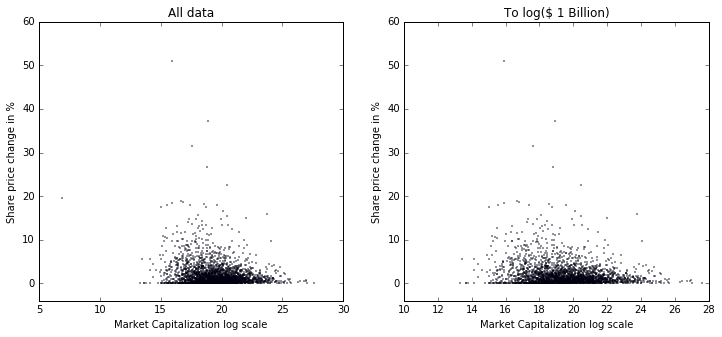

In [20]:
# Take absolute value of the price change
abs_change = [abs(element) for element in Data_inv[3]]
mark_cap = [log(element) for element in Data_inv[2]]

# Plot figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(mark_cap, abs_change, s=1, c='b', marker='.')
#axes[0].set_xlim([0, 1.0e9])
axes[0].set_ylim([-4,60])
axes[0].set_title('All data')
axes[0].set_xlabel('Market Capitalization log scale')
axes[0].set_ylabel('Share price change in %')

axes[1].scatter(mark_cap, abs_change, s=1, c='b', marker='.')
axes[1].set_xlim([10, 28])
axes[1].set_ylim([-4,60])
axes[1].set_title('To log(\$ 1 Billion)')
axes[1].set_xlabel('Market Capitalization log scale')
axes[1].set_ylabel('Share price change in %')
plt.show()

In [ ]:
[]